In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('vd_seaborn/salary.csv', index_col=0)

In [4]:
df.shape

(59437, 6)

In [5]:
df.head()

,District,Salary,Age,English,Education,Gender
0,Brooklyn,120000.0,31,Only language,Academic degree,Male
1,Brooklyn,45000.0,28,Only language,Academic degree,Female
2,Manhatten,85000.0,54,Only language,Academic degree,Male
3,Manhatten,12000.0,45,Only language,High school diploma,Female
4,Brooklyn,0.0,75,Very well,Academic degree,Female


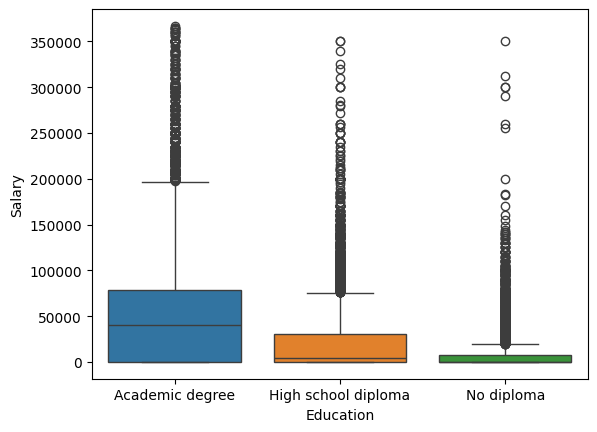

In [6]:
# ve box cho x=Education va y=Salary
sns.boxplot(data=df, x='Education', y='Salary', hue='Education');

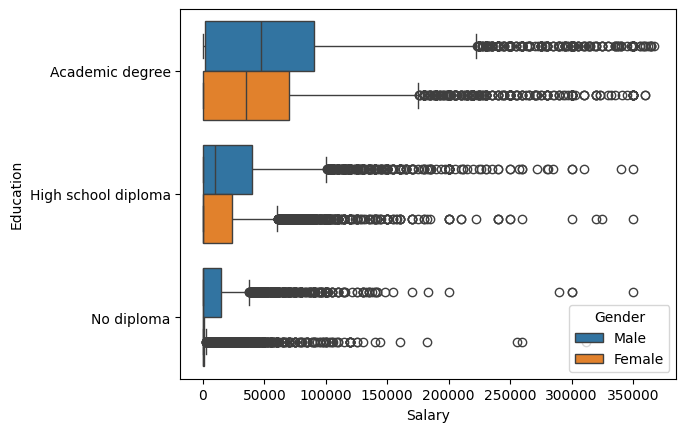

In [7]:
sns.boxplot(data=df, y='Education', x='Salary', hue='Gender'); #Nếu đảo ngược x và y thì seaborn sẽ tự đảo chiều của boxplot luôn
                                                               # không cần phải chỉnh orientation như matplotlib
#Lương trung bình của người nam cao hơn người nữ, trong cả 3 nhóm

In [8]:
tips = sns.load_dataset('tips')

In [9]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


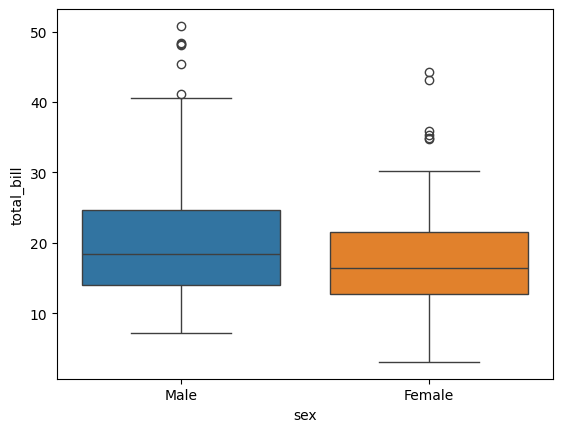

In [10]:
sns.boxplot(data=tips, x='sex', y='total_bill', hue='sex');

In [11]:
# biet cac upper oulier cua nhom Male
tips_male = tips[tips['sex']=='Male']
Q1 = np.quantile(tips_male['total_bill'], 0.25)
Q3 = np.quantile(tips_male['total_bill'], 0.75)
IQR = Q3 - Q1
print('Q1=', Q1)
print('Q3=', Q3)
print('IQR=', IQR)

Q1= 14.0
Q3= 24.71
IQR= 10.71


In [12]:
upper_whisker = Q3 + 1.5*IQR
print('upper whisker', upper_whisker)

upper whisker 40.775000000000006


In [13]:
# cac oulier:
tips[tips['total_bill']>upper_whisker]

#Outlier này không hẳn là do sai sót trong quá trình thu  thập dữ liệu, mà là do kết quả thống kê đề xuất
#Đối với các outlier này, có thể cân nhắc bỏ, hoặc giữ lại, hoặc gom chúng vào một nhóm riêng để phân tích riêng

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


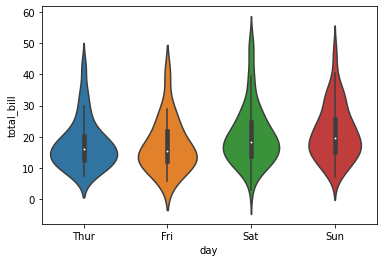

In [17]:
sns.violinplot(data=tips, x='day', y='total_bill'); # density plot
                                                    #Biểu đồ violin, chỉ cho thấy mật độ hay phân phối của dataset, không thấy outlier
                                                    #Thanh màu đen nhỏ nằm trong là khoảng tin cậy
                                                    #Hộp màu đen dài ở trong là khoảng Q1-Q3
                                                    #Chấm trắng trong hộp màu đen là trung vị median

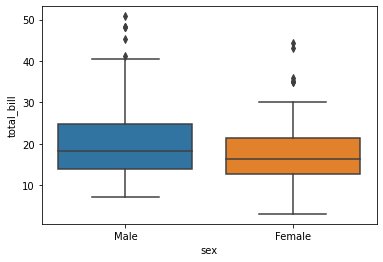

In [18]:
sns.boxplot(data=tips, x='sex', y='total_bill');

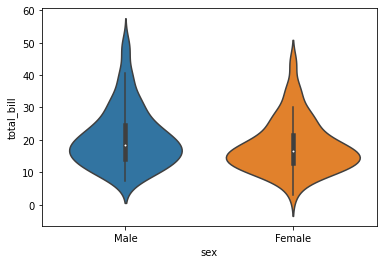

In [19]:
sns.violinplot(data=tips, x='sex', y='total_bill');

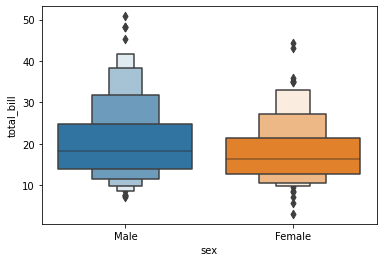

In [20]:
sns.boxenplot(data=tips, x='sex', y='total_bill'); #Boxenplot cũng khá giống violinplot, nhưng có show outlier ra (chỉ lấy đại diện, not all)

In [ ]:
#Tóm lại, trong cả ba cái boxplot, violinplot và boxenplot thì boxplot thể hiện nhiều thông tin nhất